<a href="https://colab.research.google.com/github/TitoBotelho/RecomendacaoPorImagens/blob/main/Recomenda%C3%A7%C3%A3o_por_imagens_fast_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema de recomendação por imagens digitais - Fast food




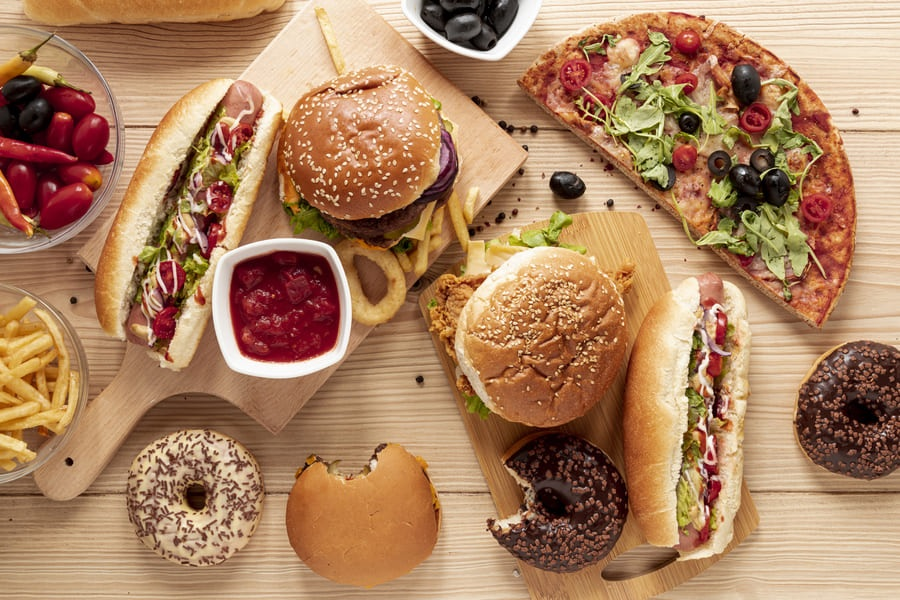

O Google, o Facebook, a Amazon e outras empresas se utilizam de algoritmos de Machine Learning para sistemas de recomendação. Baseado no histórico do usuário e em grupos de pessoas parecidos, o algoritmo oferece opções parecidas para aquele usuário que ele tem a possibilidade de gostar. Este exercício pretende, a partir de uma foto de Hambúrguer, por exemplo, mostrar mais fotos de Hambúrguer para o usuário. Utilizei uma base de dados pronta do Kaggle e um algoritmo pronto com algumas modificações. São cinco classes de comidas de fast food: Hambúrguer, Donut, Hot Dog, Pizza e Taco


# Base de dados e código de referência

https://www.kaggle.com/datasets/utkarshsaxenadn/fast-food-classification-dataset


https://www.kaggle.com/code/danyowcheung/fast-food-classifiacation-resnet50

# Importando as bibliotecas

In [ ]:
#importando as bibliotecas
import glob 
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import numpy as np
import pandas as pd
import random 

In [ ]:
#hide
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# É preciso baixar a API do Kaggle para baixar o banco de dados

In [ ]:
#hide
#é preciso pedir uma API para o Kaggle. Ele vai dar um arquivo json com um usuário e senha
%%writefile kaggle.json
{"username":"titobotelho","key":"42e65623d871cfa5124f93199a90738c"}

Writing kaggle.json


In [ ]:
#hide
!pip install -q -U kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 7.1 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=2e2d58c9f52fc34979a45b258df047fdb61c6b1c17026b2169c9f202a3eec6a3
  Stored in directory: /root/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


# Baixando o banco de dados e descomprimindo a pasta

In [ ]:

#hide-output
# downloading raw images from kaggle
#fazer o download das imagens e deszipar as pastas

!kaggle datasets download -d utkarshsaxenadn/fast-food-classification-dataset
!unzip fast-food-classification-dataset.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: Fast Food Classification V2/Train/Taquito/Taquito-Train (1).jpeg  
  inflating: Fast Food Classification V2/Train/Taquito/Taquito-Train (10).jpeg  
  inflating: Fast Food Classification V2/Train/Taquito/Taquito-Train (100).jpeg  
  inflating: Fast Food Classification V2/Train/Taquito/Taquito-Train (1000).jpeg  
  inflating: Fast Food Classification V2/Train/Taquito/Taquito-Train (1001).jpeg  
  inflating: Fast Food Classification V2/Train/Taquito/Taquito-Train (1002).jpeg  
  inflating: Fast Food Classification V2/Train/Taquito/Taquito-Train (1003).jpeg  
  inflating: Fast Food Classification V2/Train/Taquito/Taquito-Train (1004).jpeg  
  inflating: Fast Food Classification V2/Train/Taquito/Taquito-Train (1005).jpeg  
  inflating: Fast Food Classification V2/Train/Taquito/Taquito-Train (1006).jpeg  
  inflating: Fast Food Classification V2/Train/Taquito/Taquito-Train (1007).jpeg  
  inflating: Fast Food Classificat

In [ ]:
#apontar as pastas de treinamento e de validação

train_data_dir ='/content/Fast Food Classification V2/Train' 




val_data_dir = '/content/Fast Food Classification V2/Valid'





In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    )
val_datagen = ImageDataGenerator(
    rescale=1./255,
)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (180,180),
    batch_size=32,
    # class_mode default value is clasification
)
val_generator = train_datagen.flow_from_directory(
    val_data_dir,
    target_size = (180,180),
    batch_size=32,
    
)


Found 15000 images belonging to 10 classes.
Found 3500 images belonging to 10 classes.


In [ ]:
#defirir os rótulos das 5 classes: Hamburguer, Donut, Hot Dog, Pizza e Sanduiche

labels = ['Burger','Donut','Hot Dog','Pizza','Sandwich']

# Imprimindo algumas imagens do banco de dados

Text(0.5, 1.0, 'Hambúrguer')

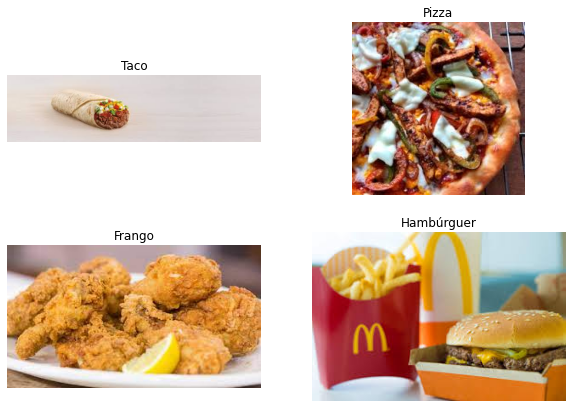

In [ ]:
#https://noemioocc.github.io/posts/Mostrar-varias-im%C3%A1genes-con-matplotlib/

fig = plt.figure(figsize=(10, 7)) 
  
rows = 2
columns = 2
  
Image1 = cv2.imread('/content/Fast Food Classification V2/Test/Taquito/Taquito-Test (1).jpeg')
Image1RGB = cv2.cvtColor(Image1, cv2.COLOR_BGR2RGB)

Image2 = cv2.imread('/content/Fast Food Classification V2/Test/Pizza/Pizza-Test (100).jpeg')
Image2RGB = cv2.cvtColor(Image2, cv2.COLOR_BGR2RGB)

Image3 = cv2.imread('/content/Fast Food Classification V2/Test/Crispy Chicken/Crispy Chicken-Test (10).jpeg')
Image3RGB = cv2.cvtColor(Image3, cv2.COLOR_BGR2RGB)


Image4 = cv2.imread('/content/Fast Food Classification V2/Test/Burger/Burger-Test (10).jpeg')
Image4RGB = cv2.cvtColor(Image4, cv2.COLOR_BGR2RGB)


  
fig.add_subplot(rows, columns, 1) 
  
plt.imshow(Image1RGB) 
plt.axis('off') 
plt.title("Taco") 
  
fig.add_subplot(rows, columns, 2) 
  
plt.imshow(Image2RGB) 
plt.axis('off') 
plt.title("Pizza") 
  
fig.add_subplot(rows, columns, 3) 
  
plt.imshow(Image3RGB) 
plt.axis('off') 
plt.title("Frango") 
  
fig.add_subplot(rows, columns, 4) 
  
plt.imshow(Image4RGB) 
plt.axis('off') 
plt.title("Hambúrguer") 

# build the model

In [ ]:
#importar a rede resnet50 do tensorflow

from tensorflow.keras.applications.resnet50 import ResNet50
model = ResNet50(weights='imagenet',include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
# from keras.layers.serialization import activation
result = model.output 
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
result = GlobalAveragePooling2D()(result)
result = Dense(512,activation='relu')(result)
predictions = Dense(5,activation='sigmoid')(result)

In [ ]:
import tensorflow as tf 
from tensorflow.keras.models import Model
resnet_model = Model(inputs=model.input,outputs=predictions)

resnet_model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

In [ ]:
#treinamento do modelo com 50 épocas

with tf.device("/device:GPU:0"):
    
    history = resnet_model.fit_generator(
        train_generator,
        epochs=50,
        shuffle=True,
        verbose=1,
        validation_data=val_generator)


<ipython-input-17-9a6bdb7ebb93>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet_model.fit_generator(


Epoch 1/50
235/235 [==============================] - 69s 294ms/step - loss: 0.5867 - accuracy: 0.7904 - val_loss: 2.1843 - val_accuracy: 0.2556
Epoch 2/50
235/235 [==============================] - 69s 294ms/step - loss: 0.5454 - accuracy: 0.8080 - val_loss: 1.0223 - val_accuracy: 0.6628
Epoch 3/50
235/235 [==============================] - 69s 291ms/step - loss: 0.4549 - accuracy: 0.8413 - val_loss: 1.7724 - val_accuracy: 0.5652
Epoch 4/50
235/235 [==============================] - 69s 291ms/step - loss: 0.3912 - accuracy: 0.8637 - val_loss: 2.3516 - val_accuracy: 0.4788
Epoch 5/50
235/235 [==============================] - 69s 293ms/step - loss: 0.4228 - accuracy: 0.8527 - val_loss: 1.5415 - val_accuracy: 0.5092
Epoch 6/50
235/235 [==============================] - 69s 292ms/step - loss: 0.4260 - accuracy: 0.8523 - val_loss: 1.8790 - val_accuracy: 0.5180
Epoch 7/50
235/235 [==============================] - 69s 291ms/step - loss: 0.3188 - accuracy: 0.8896 - val_loss: 2.5106 - val_ac

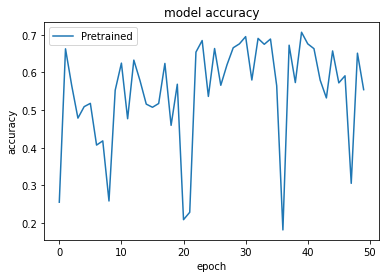

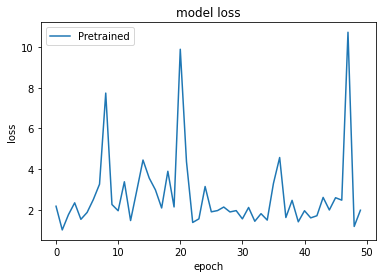

In [ ]:
#plot dos gráficos de acurácia e perda

import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Pretrained'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Pretrained'], loc='upper left')
plt.show()

In [ ]:
history.history['accuracy'][-1]

0.8248000144958496